<a href="https://colab.research.google.com/github/lucianoalfio/Machine-learning/blob/main/NaiveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from yellowbrick.classifier import ConfusionMatrix

In [89]:
base = pd.read_csv('insurance.csv')
base.head(3)

,Unnamed: 0,GoodStudent,Age,SocioEcon,RiskAversion,VehicleYear,ThisCarDam,RuggedAuto,Accident,MakeModel,...,HomeBase,AntiTheft,PropCost,OtherCarCost,OtherCar,MedCost,Cushioning,Airbag,ILiCost,DrivHist
0,1,False,Adult,Prole,Adventurous,Older,Moderate,EggShell,Mild,Economy,...,City,False,TenThou,Thousand,True,Thousand,Poor,False,Thousand,Many
1,2,False,Senior,Prole,Cautious,Current,NaN,Football,NaN,Economy,...,City,True,Thousand,Thousand,True,Thousand,Good,True,Thousand,Zero
2,3,False,Senior,UpperMiddle,Psychopath,Current,NaN,Football,NaN,FamilySedan,...,City,False,Thousand,Thousand,False,Thousand,Good,True,Thousand,One


In [100]:
base = base.drop('Unnamed: 0',axis=1)

In [101]:
base = base.dropna()

In [102]:
 base.iloc[:,[0,1,2,3,4,5,6,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26]]

,GoodStudent,Age,SocioEcon,RiskAversion,VehicleYear,ThisCarDam,RuggedAuto,MakeModel,DrivQuality,Mileage,...,HomeBase,AntiTheft,PropCost,OtherCarCost,OtherCar,MedCost,Cushioning,Airbag,ILiCost,DrivHist
0,False,Adult,Prole,Adventurous,Older,Moderate,EggShell,Economy,Poor,TwentyThou,...,City,False,TenThou,Thousand,True,Thousand,Poor,False,Thousand,Many
4,False,Adolescent,Prole,Normal,Older,Moderate,Football,Economy,Poor,FiftyThou,...,City,False,TenThou,Thousand,False,Thousand,Fair,False,Thousand,Many
5,False,Adult,UpperMiddle,Normal,Current,Moderate,EggShell,SportsCar,Poor,FiftyThou,...,Suburb,True,HundredThou,HundredThou,True,TenThou,Poor,True,Thousand,Many
6,False,Senior,UpperMiddle,Normal,Current,Mild,Football,Economy,Poor,FiveThou,...,Secure,True,TenThou,Thousand,False,Thousand,Excellent,True,Thousand,Many
7,False,Adult,Prole,Normal,Older,Severe,EggShell,Economy,Poor,TwentyThou,...,City,False,Million,HundredThou,True,Thousand,Fair,False,Thousand,Many
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19979,True,Adolescent,Middle,Adventurous,Older,Severe,Tank,FamilySedan,Poor,FiftyThou,...,City,False,HundredThou,HundredThou,True,Thousand,Excellent,False,Thousand,Many
19981,False,Adult,Middle,Normal,Older,Moderate,Football,FamilySedan,Poor,FiftyThou,...,Secure,True,TenThou,Thousand,False,Thousand,Good,False,Thousand,Many
19983,False,Adult,Prole,Adventurous,Current,Mild,Football,Economy,Poor,TwentyThou,...,Rural,False,TenThou,Thousand,False,Thousand,Excellent,True,Thousand,Many
19994,False,Adult,UpperMiddle,Normal,Older,Moderate,Football,FamilySedan,Poor,TwentyThou,...,Secure,True,TenThou,Thousand,False,Thousand,Good,False,Thousand,Many


In [103]:
y = base.iloc[:,7].values
X = base.iloc[:,[0,1,2,3,4,5,6,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26]].values

In [104]:
labelencoder = LabelEncoder()

In [105]:
for i in range(X.shape[1]):
  if X[:,i].dtype == 'object':
    X[:,i] = labelencoder.fit_transform(X[:,i])

In [106]:
X

array([[0, 1, 1, ..., 0, 3, 0],
       [0, 0, 1, ..., 0, 3, 0],
       [0, 1, 2, ..., 1, 3, 0],
       ...,
       [0, 1, 1, ..., 1, 3, 0],
       [0, 1, 2, ..., 0, 3, 0],
       [0, 1, 1, ..., 0, 3, 0]], dtype=object)

In [107]:
# X independentes
# y a variável dependente
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X,y,test_size=0.3, random_state=1)

In [108]:
modelo = GaussianNB()
modelo.fit(X_treinamento,y_treinamento)

GaussianNB()

In [109]:
previsoes = modelo.predict(X_teste)

In [110]:
type(previsoes)
print(previsoes)

['Moderate' 'Moderate' 'Mild' ... 'Severe' 'Moderate' 'Moderate']


In [111]:
accuracy = accuracy_score(y_teste, previsoes)
precision = precision_score(y_teste, previsoes, average='weighted')
recall = recall_score(y_teste, previsoes, average='weighted')
f1 = f1_score(y_teste, previsoes, average='weighted')
print(f'Acuracia: {accuracy}, Precisão: {precision}, Recall {recall}, F1: {f1}')

Acuracia: 0.5507518796992481, Precisão: 0.7895298876518713, Recall 0.5507518796992481, F1: 0.4612364968688108


In [112]:
report =  classification_report(y_teste, previsoes)
print(report)

              precision    recall  f1-score   support

        Mild       0.95      0.87      0.91       423
    Moderate       0.41      0.96      0.57       497
      Severe       0.97      0.05      0.10       676

    accuracy                           0.55      1596
   macro avg       0.78      0.63      0.53      1596
weighted avg       0.79      0.55      0.46      1596



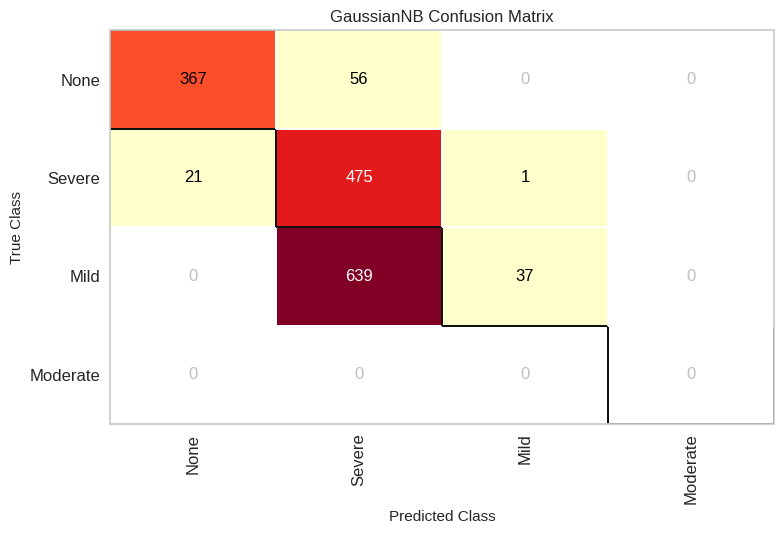

<Axes: title={'center': 'GaussianNB Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [113]:
confusao = ConfusionMatrix(modelo, classes=['None','Severe','Mild','Moderate'])
confusao.fit(X_treinamento,y_treinamento)
confusao.score(X_teste,y_teste)
confusao.poof()